In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Very hacky, bad thing to do.
SRC_PATH = os.path.realpath('../src')
sys.path.append(SRC_PATH)

In [3]:
# Local imports.
from analysis import single_cycles
from defaults import PITCH_RATE, SAMPLE_RATE
from synthesis import EnvelopeMorpher, StimulusGenerator
from util import midi_to_hz, time_plot, stft_plot

In [4]:
# Synthesis parameters.
num_partials = 70
midi_pitch = 48
fm_depth = 0.1314
f0 = midi_to_hz(midi_pitch)

In [5]:
# Load env as linear amplitude. (CheapTrick calculates the power spectrum.)
env = single_cycles[0]['env']
env = np.sqrt(env)

In [6]:
# Modify the spectral envelopes.

morpher = EnvelopeMorpher(env)
morpher.shuffle_phase(num_shifts=4)

# Check that the shuffler is working.
print(env - morpher())

[[ 1.13612357e-01  1.12441438e-01 -1.11184336e-02 ...  6.84260043e-05
   0.00000000e+00  5.20180149e-05]
 [ 1.12561786e-01  1.11900597e-01  3.36216856e-02 ...  1.82091417e-05
   0.00000000e+00  1.25651262e-05]
 [ 8.61363815e-02  8.60852779e-02  1.47189322e-02 ... -6.06243686e-06
   0.00000000e+00 -3.21913394e-06]
 ...
 [ 1.56857272e-01  1.54978316e-01 -8.73067075e-02 ...  8.13233012e-05
   0.00000000e+00  1.86129788e-04]
 [ 1.50147156e-01  1.47978598e-01 -1.34616548e-01 ...  7.62888059e-05
   0.00000000e+00  1.40867598e-04]
 [ 1.14409729e-01  1.12813947e-01 -1.13087585e-01 ...  1.82997484e-05
   0.00000000e+00  9.14997674e-06]]


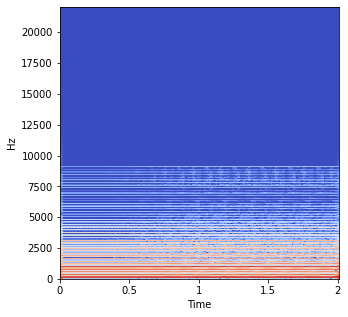

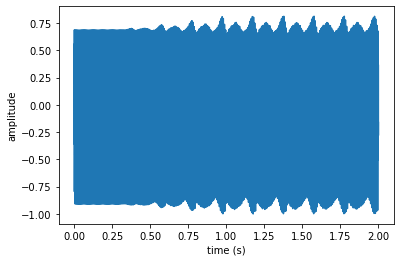

In [7]:
# Rock 'n' Roll.

generator = StimulusGenerator(sr=SAMPLE_RATE, pr=PITCH_RATE)

# FROZEN reconstruction condition.
x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=env,
    num_partials=70,
    length=2.,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))

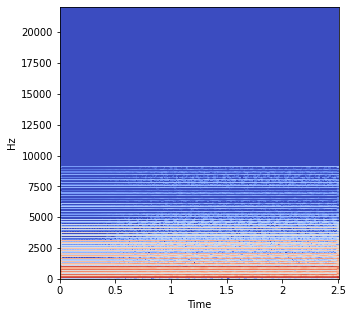

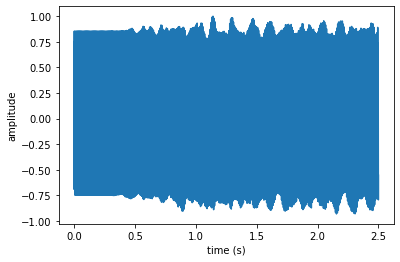

In [14]:
# Random amplitude modulation rate condition (RAF).

x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=env,
    num_partials=70,
    length=2.5,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
    synth_mode='raf',
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))

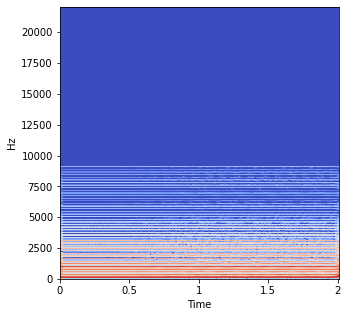

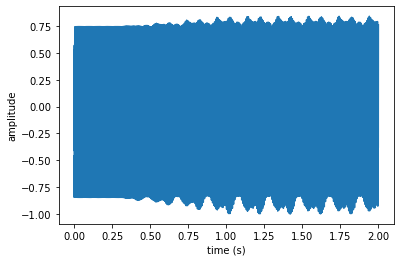

In [15]:
# Amplitude modulation phase-shuffled condition.

morpher.shuffle_phase(num_shifts=4)

x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=morpher(),
    num_partials=70,
    length=2.,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))

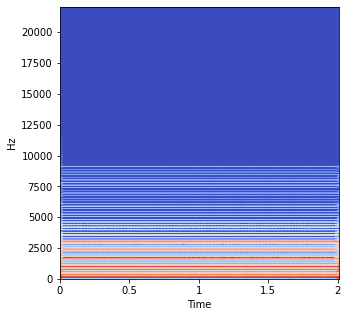

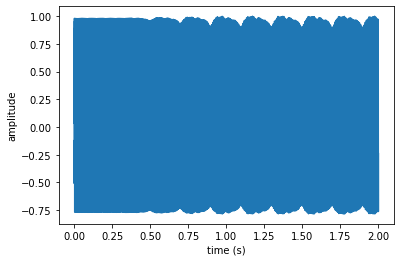

In [16]:
# PAM mode, pure amplitude modulation condition (a.k.a. tremolo).

x = generator(
    f0=f0,
    fm_depth=fm_depth*0,
    env=morpher(),
    num_partials=70,
    length=2.,
    mod_rate=5.,
    mod_hold=0.3,
    mod_fade=0.7,
    synth_mode='pam',
)

stft_plot(x)
time_plot(x)
display(ipd.Audio(x, rate=SAMPLE_RATE))